# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [14]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [15]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 601


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [16]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?appid=" + weather_api_key + "&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port mathurin
Processing Record 2 of Set 1 | vadso
Processing Record 3 of Set 1 | stanley
Processing Record 4 of Set 1 | zeya
Processing Record 5 of Set 1 | grytviken
Processing Record 6 of Set 1 | holualoa
Processing Record 7 of Set 1 | thinadhoo
Processing Record 8 of Set 1 | ust'-ilimsk
Processing Record 9 of Set 1 | puerto armuelles
Processing Record 10 of Set 1 | jamestown
Processing Record 11 of Set 1 | anadyr
Processing Record 12 of Set 1 | papatowai
Processing Record 13 of Set 1 | tura
Processing Record 14 of Set 1 | talnakh
Processing Record 15 of Set 1 | port-aux-francais
Processing Record 16 of Set 1 | andkhoy
Processing Record 17 of Set 1 | fort st. john
Processing Record 18 of Set 1 | oodweyne
Processing Record 19 of Set 1 | adamstown
Processing Record 20 of Set 1 | broken hill
Processing Record 21 of Set 1 | port elizabeth
Processing Record 22 of Set 1 | heilbron
Processing Record 2

Processing Record 41 of Set 4 | muscat
Processing Record 42 of Set 4 | inarajan village
Processing Record 43 of Set 4 | badger
Processing Record 44 of Set 4 | huarmey
Processing Record 45 of Set 4 | shingu
Processing Record 46 of Set 4 | saint-pierre
Processing Record 47 of Set 4 | labuan
Processing Record 48 of Set 4 | palmas
Processing Record 49 of Set 4 | tirebolu
Processing Record 0 of Set 5 | lebu
Processing Record 1 of Set 5 | santo tome
Processing Record 2 of Set 5 | xining
Processing Record 3 of Set 5 | balykshi
Processing Record 4 of Set 5 | karratha
Processing Record 5 of Set 5 | kachug
Processing Record 6 of Set 5 | freetown
Processing Record 7 of Set 5 | polyarnyy
Processing Record 8 of Set 5 | dakhla
Processing Record 9 of Set 5 | island harbour
Processing Record 10 of Set 5 | boende
Processing Record 11 of Set 5 | puerto baquerizo moreno
Processing Record 12 of Set 5 | igarka
Processing Record 13 of Set 5 | thompson
Processing Record 14 of Set 5 | khmelnytskyi
Processing 

Processing Record 31 of Set 8 | virar
Processing Record 32 of Set 8 | salalah
Processing Record 33 of Set 8 | tonota
Processing Record 34 of Set 8 | carnarvon
Processing Record 35 of Set 8 | mishelevka
Processing Record 36 of Set 8 | colonia
Processing Record 37 of Set 8 | wanning
Processing Record 38 of Set 8 | santa elena de uairen
Processing Record 39 of Set 8 | kruisfontein
Processing Record 40 of Set 8 | vila velha
Processing Record 41 of Set 8 | longgang
Processing Record 42 of Set 8 | toliara
Processing Record 43 of Set 8 | springs
Processing Record 44 of Set 8 | villa ojo de agua
Processing Record 45 of Set 8 | souillac
Processing Record 46 of Set 8 | troitskoye
Processing Record 47 of Set 8 | borodulikha
Processing Record 48 of Set 8 | puerto santa
Processing Record 49 of Set 8 | tindouf
Processing Record 0 of Set 9 | sitangkai
Processing Record 1 of Set 9 | west end
Processing Record 2 of Set 9 | nizip
Processing Record 3 of Set 9 | awjilah
Processing Record 4 of Set 9 | bac 

Processing Record 20 of Set 12 | flin flon
Processing Record 21 of Set 12 | koryukivka
Processing Record 22 of Set 12 | galle
Processing Record 23 of Set 12 | mili
Processing Record 24 of Set 12 | hargeysa
Processing Record 25 of Set 12 | visby
Processing Record 26 of Set 12 | villa de soto
Processing Record 27 of Set 12 | silver city
Processing Record 28 of Set 12 | milagros
Processing Record 29 of Set 12 | aliveri
Processing Record 30 of Set 12 | yelizovo
Processing Record 31 of Set 12 | kavieng
Processing Record 32 of Set 12 | qulsary
Processing Record 33 of Set 12 | dongtai
Processing Record 34 of Set 12 | walvis bay
Processing Record 35 of Set 12 | port douglas
Processing Record 36 of Set 12 | hengchun
Processing Record 37 of Set 12 | kuala belait
Processing Record 38 of Set 12 | kanniyakumari
Processing Record 39 of Set 12 | yeongdong
Processing Record 40 of Set 12 | tadine
Processing Record 41 of Set 12 | al burayqah
Processing Record 42 of Set 12 | nieuw nickerie
Processing Rec

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,279.76,97,100,9.70,TF,1682560486
1,hawaiian paradise park,19.5933,-154.9731,300.88,73,40,4.12,US,1682560486
2,tahe,52.3333,124.7333,280.70,24,69,2.13,CN,1682560486
3,grytviken,-54.2811,-36.5092,273.43,73,100,4.22,GS,1682560487
4,invercargill,-46.4000,168.3500,284.83,82,42,0.89,NZ,1682560487


In [1]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

NameError: name 'city_data_df' is not defined

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_df_head()

FileNotFoundError: [Errno 2] No such file or directory: 'output_data/cities.csv'

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [ ]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"])
# Incorporate the other graph properties
plt.title("Latitude vs Temperature")
plt.ylabel("Max Temp")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

FileNotFoundError: [Errno 2] No such file or directory: 'output_data/Fig2.png'

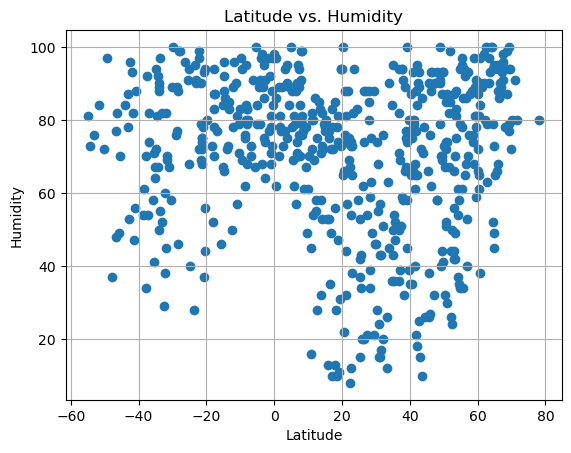

In [13]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"])
# Incorporate the other graph properties
plt.title(f"Latitude vs. Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

In [ ]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.title("Latitude vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

In [ ]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.title("Latitude vs. Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [ ]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
nothern_hemi_df= city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df= city_data_df.loc[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

###  Temperature vs. Latitude Linear Regression Plot

In [ ]:
# Linear regression on Northern Hemisphere
x= northern_hemi_df["Lat"]
y= nothern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

regressvalues= x* slope +intercept 

#line equation 
line_e= "y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))

#line equation 
line_e= "y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))

# Plot
plt.scatter(x,y)
plt.plot(x, regressvalues, "r-")
plt.ylabel ("Max Temp")
plt.xlabel("Latitude")
plt.show()

In [ ]:
# Linear regression on Southern Hemisphere
x= southern_hemi_df["Lat"]
y= southern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

regressvalues= x* slope +intercept 

#line equation 
line_e= "y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))

#line equation 
line_e= "y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))

# Plot
plt.scatter(x,y)
plt.plot(x, regressvalues, "r-")
plt.ylabel ("Max Temp")
plt.xlabel("Latitude")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
x= northern_hemi_df["Lat"]
y= nothern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

regressvalues= x* slope +intercept 

#line equation 
line_e= "y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))

#line equation 
line_e= "y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))

# Plot
plt.scatter(x,y)
plt.plot(x, regressvalues, "r-")
plt.ylabel ("Wind Speed")
plt.xlabel("Latitude")
plt.show()

In [ ]:
# Southern Hemisphere
x= southern_hemi_df["Lat"]
y= southern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

regressvalues= x* slope +intercept 

#line equation 
line_e= "y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))

#line equation 
line_e= "y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))

# Plot
plt.scatter(x,y)
plt.plot(x, regressvalues, "r-")
plt.ylabel ("Wind Speed")
plt.xlabel("Latitude")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
x= northern_hemi_df["Lat"]
y= nothern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

regressvalues= x* slope +intercept 

#line equation 
line_e= "y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))

#line equation 
line_e= "y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))

# Plot
plt.scatter(x,y)
plt.plot(x, regressvalues, "r-")
plt.ylabel ("Cloudiness")
plt.xlabel("Latitude")
plt.show()

In [ ]:
# Southern Hemisphere
x= southern_hemi_df["Lat"]
y= southern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

regressvalues= x* slope +intercept 

#line equation 
line_e= "y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))

#line equation 
line_e= "y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))

# Plot
plt.scatter(x,y)
plt.plot(x, regressvalues, "r-")
plt.ylabel ("Cloudiness")
plt.xlabel("Latitude")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
x= northern_hemi_df["Lat"]
y= nothern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

regressvalues= x* slope +intercept 

#line equation 
line_e= "y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))

#line equation 
line_e= "y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))

# Plot
plt.scatter(x,y)
plt.plot(x, regressvalues, "r-")
plt.ylabel ("Wind Speed")
plt.xlabel("Latitude")
plt.show()

In [ ]:
# Southern Hemisphere
x= southern_hemi_df["Lat"]
y=southern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

regressvalues= x* slope +intercept 

#line equation 
line_e= "y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))

# Plot
plt.scatter(x,y)
plt.plot(x, regressvalues, "r-")
plt.ylabel ("Wind Speed")
plt.xlabel("Latitude")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE